In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
from IPython.display import Image

In [359]:
park_df = pd.read_csv('D:\Great Learning\R3 Lab\parkinsons.data',sep=',')

In [360]:
park_df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [361]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [362]:
park_df['status'] = pd.Categorical(park_df['status'])

In [363]:
park_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [364]:
park_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [365]:
park_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

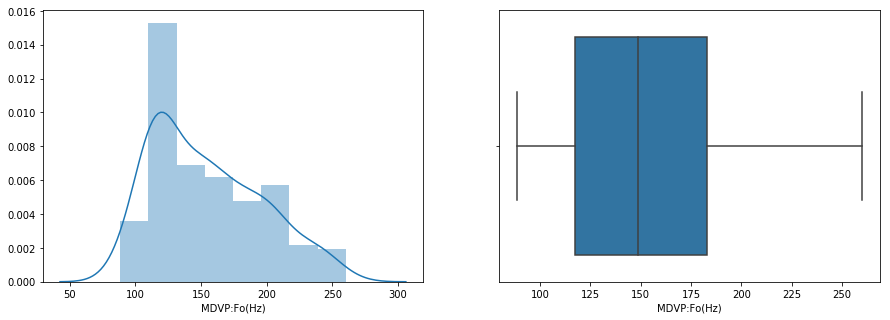

In [366]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:Fo(Hz)'], ax = axs[0])
sns.boxplot(park_df['MDVP:Fo(Hz)'], ax = axs[1])

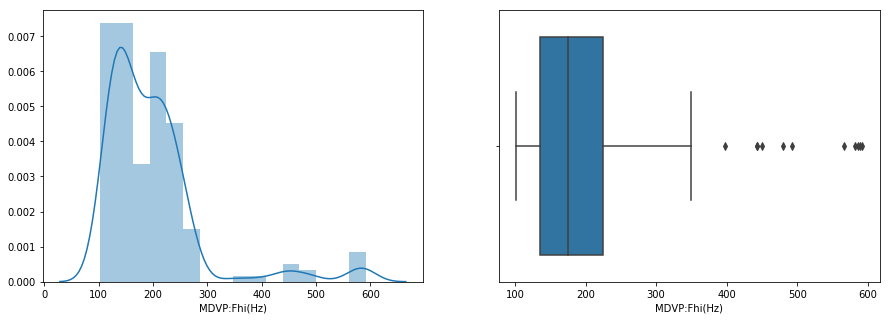

In [367]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
#sns.distplot(park_df[park_df['status']==0]['MDVP:Fhi(Hz)'],color='b',label = 'status = 0', kde = False, ax = axs[0])
#sns.distplot(park_df[park_df['status']==1]['MDVP:Fhi(Hz)'],color='r',label = 'status = 1', kde = False, ax = axs[0])
sns.distplot(park_df['MDVP:Fhi(Hz)'], ax = axs[0])
sns.boxplot(park_df['MDVP:Fhi(Hz)'], ax = axs[1])

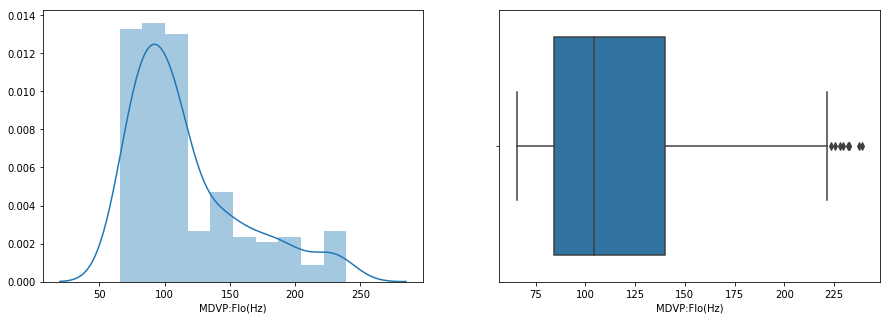

In [368]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:Flo(Hz)'], ax = axs[0])
sns.boxplot(park_df['MDVP:Flo(Hz)'], ax = axs[1])

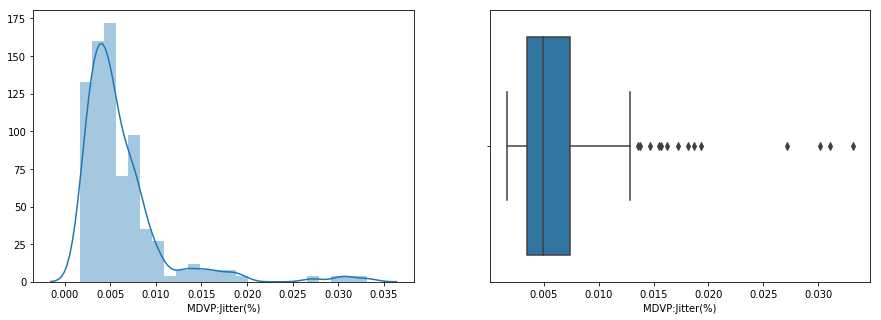

In [369]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:Jitter(%)'], ax = axs[0])
sns.boxplot(park_df['MDVP:Jitter(%)'], ax = axs[1])

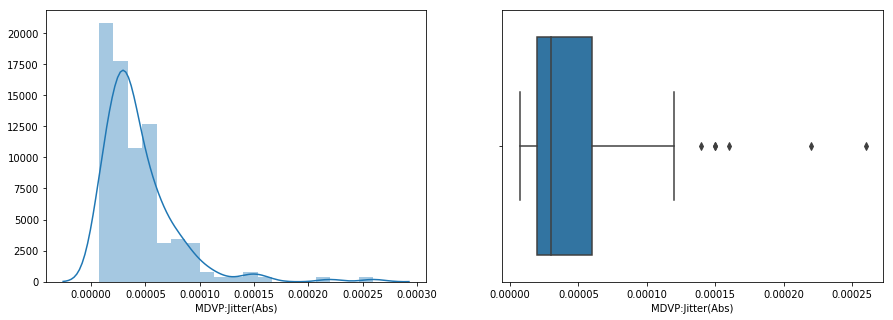

In [370]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:Jitter(Abs)'], ax = axs[0])
sns.boxplot(park_df['MDVP:Jitter(Abs)'], ax = axs[1])

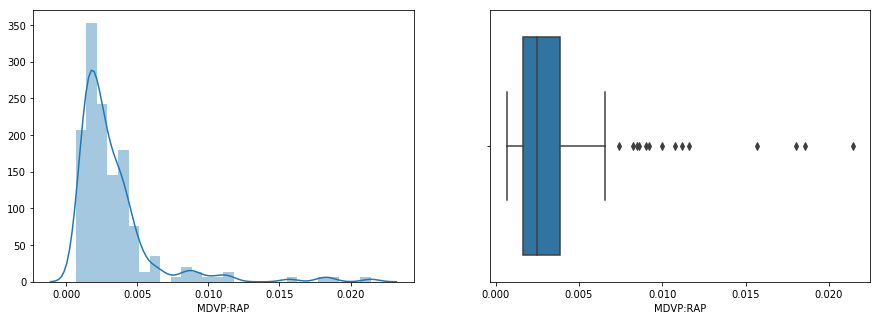

In [371]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:RAP'], ax = axs[0])
sns.boxplot(park_df['MDVP:RAP'], ax = axs[1])

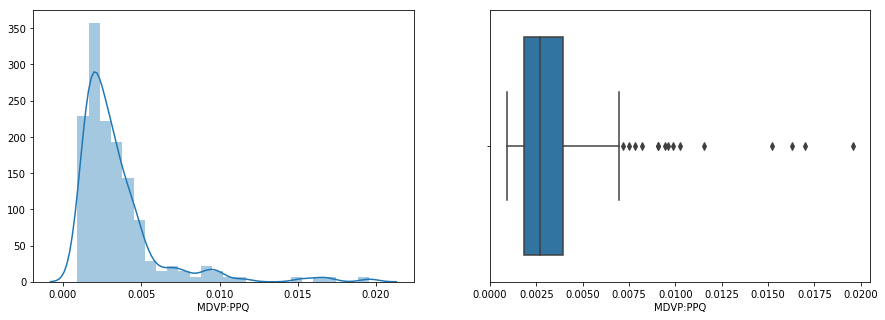

In [372]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:PPQ'], ax = axs[0])
sns.boxplot(park_df['MDVP:PPQ'], ax = axs[1])

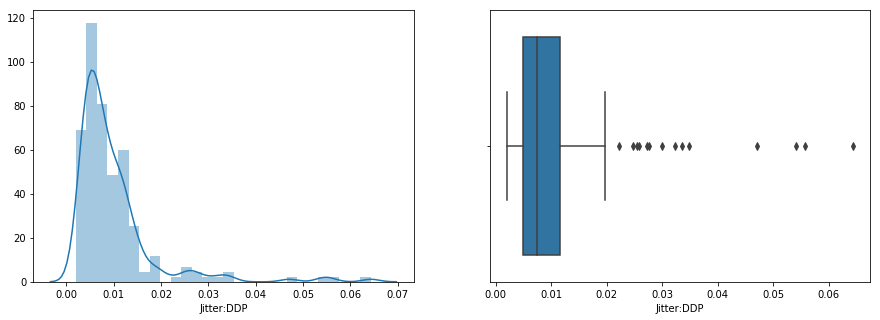

In [373]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['Jitter:DDP'], ax = axs[0])
sns.boxplot(park_df['Jitter:DDP'], ax = axs[1])

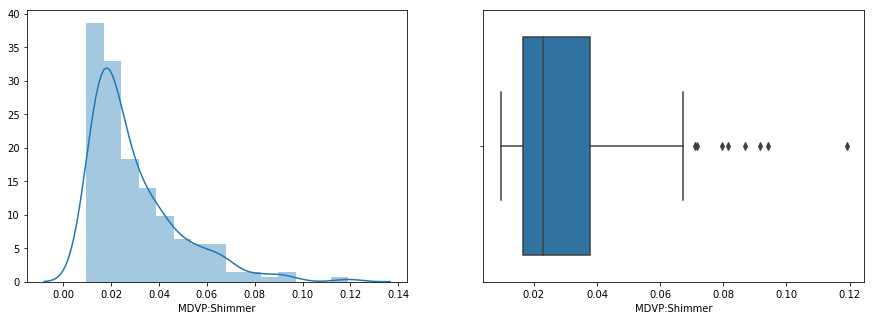

In [374]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:Shimmer'], ax = axs[0])
sns.boxplot(park_df['MDVP:Shimmer'], ax = axs[1])

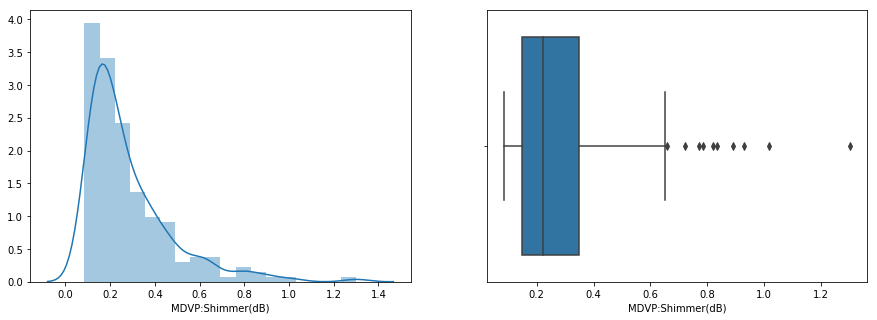

In [375]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:Shimmer(dB)'], ax = axs[0])
sns.boxplot(park_df['MDVP:Shimmer(dB)'], ax = axs[1])

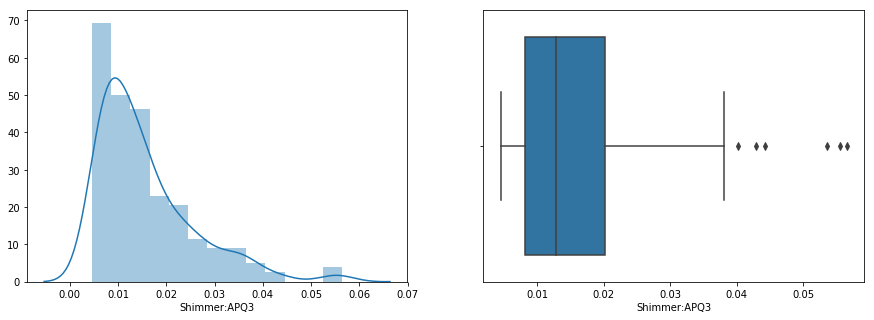

In [376]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['Shimmer:APQ3'], ax = axs[0])
sns.boxplot(park_df['Shimmer:APQ3'], ax = axs[1])

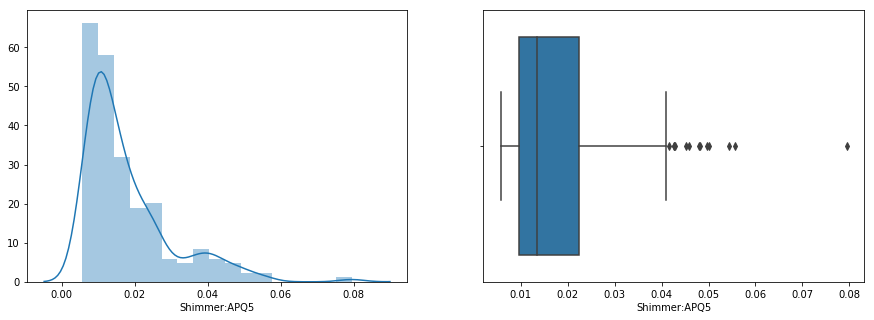

In [377]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['Shimmer:APQ5'], ax = axs[0])
sns.boxplot(park_df['Shimmer:APQ5'], ax = axs[1])

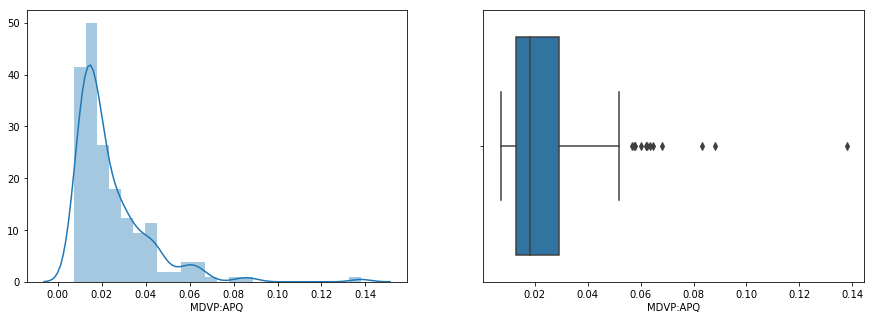

In [378]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['MDVP:APQ'], ax = axs[0])
sns.boxplot(park_df['MDVP:APQ'], ax = axs[1])

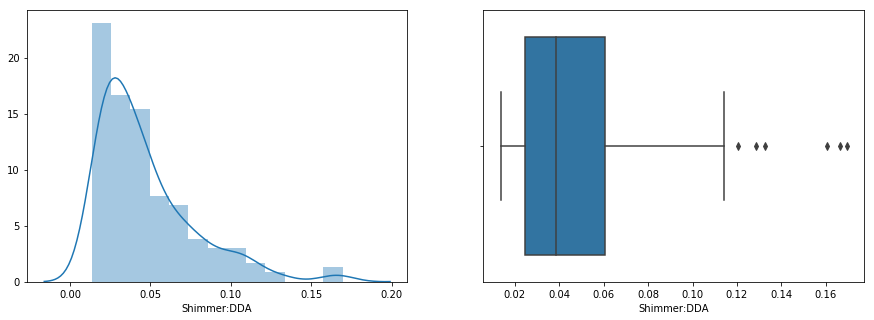

In [379]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['Shimmer:DDA'], ax = axs[0])
sns.boxplot(park_df['Shimmer:DDA'], ax = axs[1])

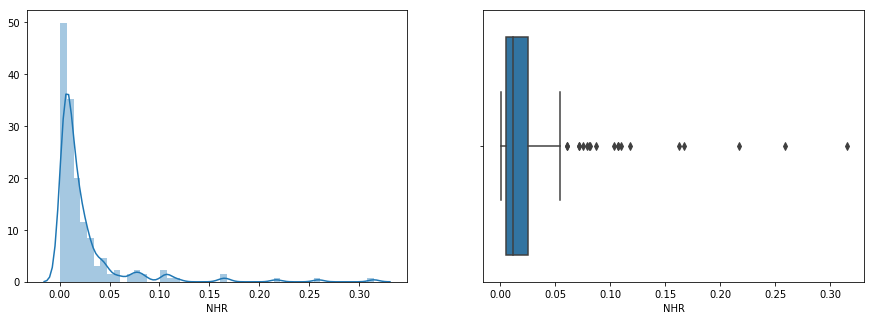

In [380]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['NHR'], ax = axs[0])
sns.boxplot(park_df['NHR'], ax = axs[1])

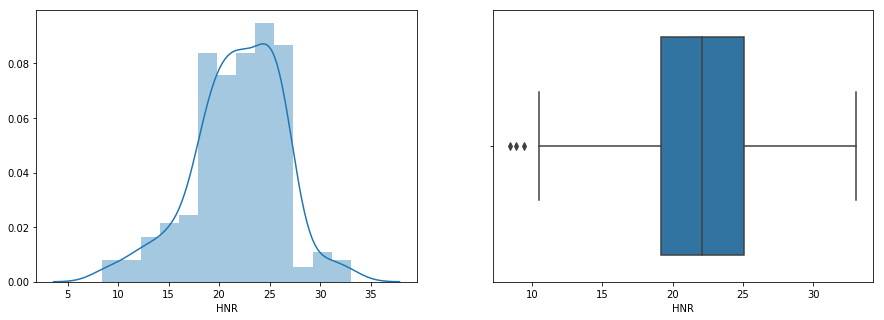

In [381]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['HNR'], ax = axs[0])
sns.boxplot(park_df['HNR'], ax = axs[1])

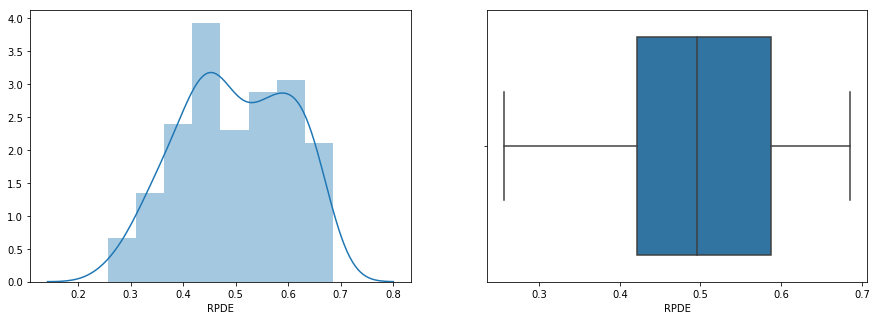

In [382]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['RPDE'], ax = axs[0])
sns.boxplot(park_df['RPDE'], ax = axs[1])

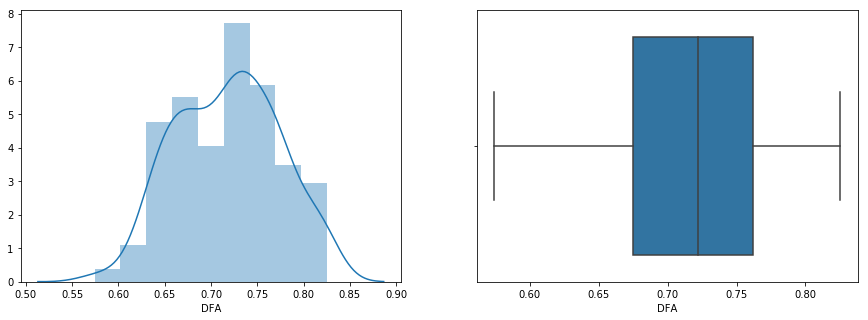

In [383]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['DFA'], ax = axs[0])
sns.boxplot(park_df['DFA'], ax = axs[1])

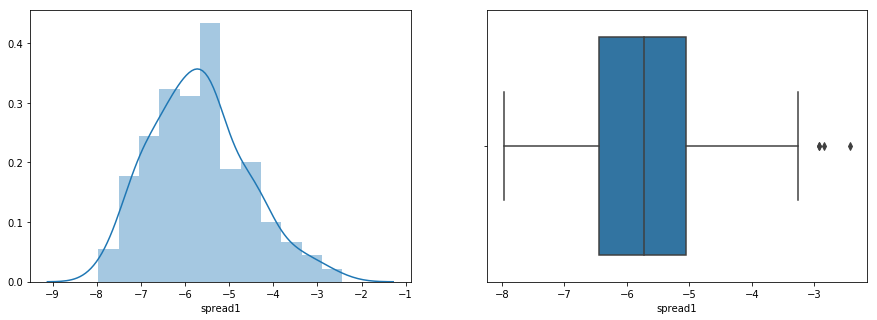

In [384]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['spread1'], ax = axs[0])
sns.boxplot(park_df['spread1'], ax = axs[1])

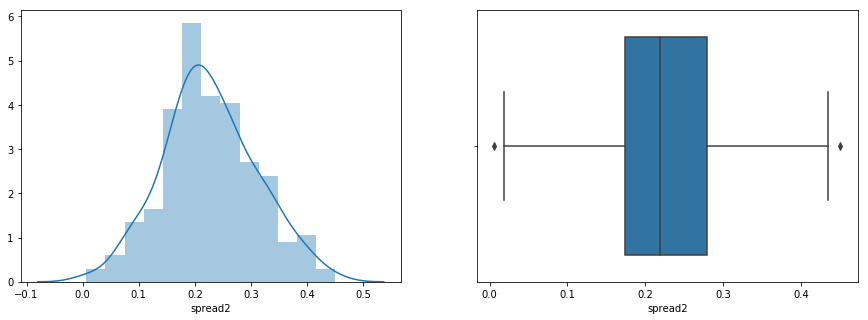

In [385]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['spread2'], ax = axs[0])
sns.boxplot(park_df['spread2'], ax = axs[1])

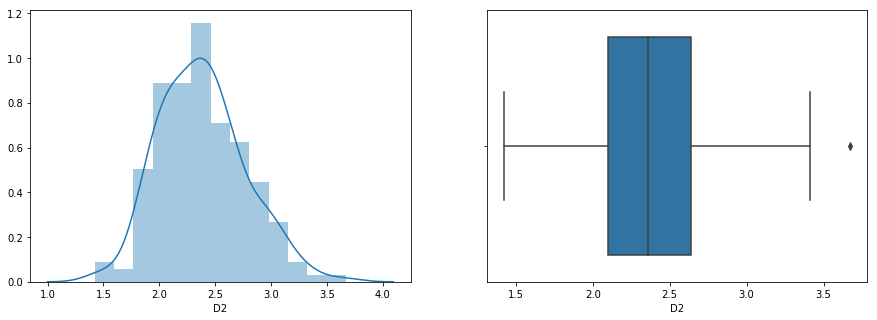

In [386]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['D2'], ax = axs[0])
sns.boxplot(park_df['D2'], ax = axs[1])

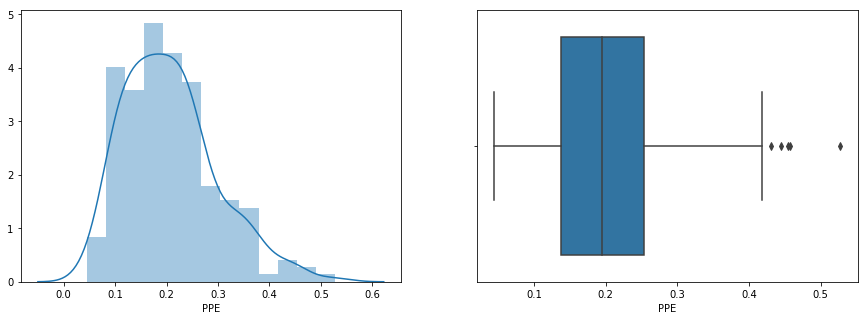

In [387]:
f, axs = matplot.subplots(1, 2, figsize=(15, 5))
sns.distplot(park_df['PPE'], ax = axs[0])
sns.boxplot(park_df['PPE'], ax = axs[1])

In [388]:
# assuming outliers dont affect the outcome of decision trees much, at this stage no outlier treatment is done

In [389]:
correl = park_df.corr()

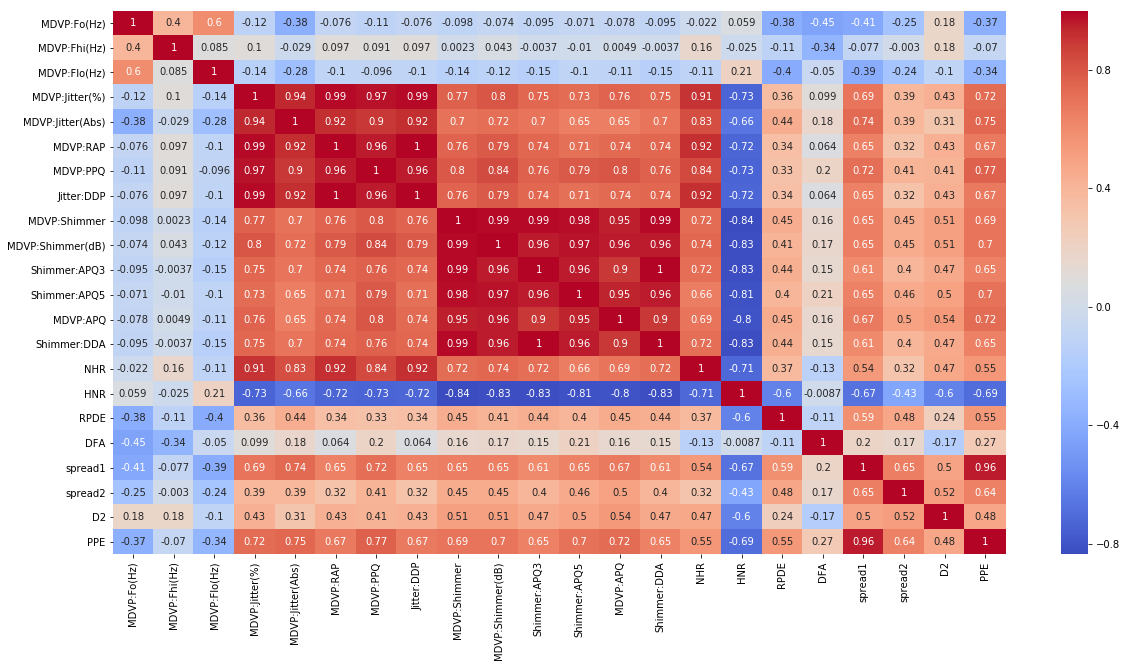

In [390]:
f, axs = matplot.subplots(figsize=(20, 10))
sns.heatmap(correl,cmap='coolwarm',ax=axs,annot=True)

In [391]:
index = correl.columns
Output = []
for i in range(0,len(index)):
    i = index[i]
    No = correl.index[(correl[i] < 0.5) & (correl[i] > -0.5)].tolist()
    Positive = correl.index[(correl[i] >= 0.5)].tolist()
    Negative = correl.index[(correl[i]<= -0.5)].tolist()

In [392]:
No

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'DFA', 'D2']

In [393]:
# following features are positively or negatively influenced by other features hence can be dropped

In [394]:
Positive

['MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'RPDE',
 'spread1',
 'spread2',
 'PPE']

In [395]:
Negative

['HNR']

In [396]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [397]:
features_vif = park_df.drop(['status'],axis=1).copy()

In [398]:
features_vif.drop(['name'],axis=1,inplace=True)

In [399]:
features_vif.shape

(195, 22)

In [400]:
features_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [401]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features_vif.values, i) for i in range(features_vif.shape[1])]
vif["features"] = features_vif.columns

In [402]:
vif.sort_values(by='VIF Factor')

,VIF Factor,features
1,8.880351e+00,MDVP:Fhi(Hz)
14,1.599717e+01,NHR
2,1.805201e+01,MDVP:Flo(Hz)
19,2.307622e+01,spread2
16,5.561441e+01,RPDE
0,1.022428e+02,MDVP:Fo(Hz)
20,1.126541e+02,D2
4,1.227165e+02,MDVP:Jitter(Abs)
15,1.321105e+02,HNR
21,1.334913e+02,PPE


In [403]:
# features selection using VIF

In [404]:
predictor_VIF = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

df_predictor = park_df[predictor_VIF].copy(deep = True)

In [405]:
threshold = 5
for i in numpy.arange(0,len(predictor_VIF)):
    vif1 = [variance_inflation_factor(df_predictor[predictor_VIF].values, j) 
    for j in range(df_predictor[predictor_VIF].shape[1])]
    maxindex = vif1.index(max(vif1))
    if max(vif1) > threshold:
        print('Eliminating \'' + df_predictor[predictor_VIF].columns[maxindex] + '\' at index: ' + str(maxindex))
        del predictor_VIF[maxindex]
    else:
        break

Eliminating 'Shimmer:APQ3' at index: 10
Eliminating 'Jitter:DDP' at index: 7
Eliminating 'MDVP:Shimmer' at index: 7
Eliminating 'MDVP:Jitter(%)' at index: 3
Eliminating 'DFA' at index: 13
Eliminating 'MDVP:Shimmer(dB)' at index: 6
Eliminating 'spread1' at index: 12
Eliminating 'Shimmer:APQ5' at index: 6
Eliminating 'MDVP:RAP' at index: 4
Eliminating 'D2' at index: 11
Eliminating 'MDVP:Jitter(Abs)' at index: 3
Eliminating 'PPE' at index: 10
Eliminating 'MDVP:Fo(Hz)' at index: 0
Eliminating 'RPDE' at index: 7
Eliminating 'MDVP:APQ' at index: 3
Eliminating 'HNR' at index: 5
Eliminating 'MDVP:PPQ' at index: 2
Eliminating 'Shimmer:DDA' at index: 2
Eliminating 'spread2' at index: 3


In [406]:
predictor_VIF

['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'NHR']

In [407]:
x_vif = park_df[predictor_VIF].copy(deep = True)

In [408]:
predictor_corr = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'DFA', 'D2']

In [409]:
x_corr = park_df[predictor_corr].copy(deep=True)

In [410]:
predictor_VIFCORR= ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'DFA', 'D2','NHR']

In [411]:
x_vifcorr = park_df[predictor_VIFCORR].copy(deep=True)

In [425]:
x_all_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

In [426]:
x_all = park_df[x_all_columns].copy(deep = True)

In [427]:
y = park_df.pop('status')

KeyError: 'status'

In [428]:
x_train, x_test, y_train, y_test = train_test_split(x_all, y, test_size=.3, random_state=99)
x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif, y, test_size=.3, random_state=99)
x_train_corr, x_test_corr, y_train_corr, y_test_corr = train_test_split(x_corr, y, test_size=.3, random_state=99)
x_train_vifcorr, x_test_vifcorr, y_train_vifcorr, y_test_vifcorr = train_test_split(x_vifcorr, y, test_size=.3, random_state=99)


In [429]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [430]:
print (pandas.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))
y_predict = dt_model.predict(x_test)

                       Imp
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.050969
MDVP:Jitter(%)    0.043122
MDVP:Jitter(Abs)  0.086791
MDVP:RAP          0.093673
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.109919
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.052127
MDVP:APQ          0.199391
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.046179
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.317828


In [431]:
metrics.confusion_matrix(y_test, y_predict)

array([[11,  7],
       [ 2, 39]], dtype=int64)

In [434]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.85      0.61      0.71        18
          1       0.85      0.95      0.90        41

avg / total       0.85      0.85      0.84        59



In [437]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predict))

0.847457627118644


In [444]:
model_performance = [metrics.accuracy_score(y_test, y_predict),metrics.recall_score(y_test, y_predict),
                         metrics.precision_score(y_test, y_predict),metrics.f1_score(y_test, y_predict) ]
accuracy_report = pandas.DataFrame(model_performance, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])

In [445]:
accuracy_report

,Model_Performance
Accuracy,0.847458
Recall,0.951220
Precision,0.847826
f1_Score,0.896552


In [446]:
accuracy_report = accuracy_report.rename(columns={"Model_Performance" : "Model_All" })

In [447]:
accuracy_report

,Model_All
Accuracy,0.847458
Recall,0.951220
Precision,0.847826
f1_Score,0.896552


In [448]:
dt_model_vif = DecisionTreeClassifier(criterion = 'entropy' )
dt_model_vif.fit(x_train_vif, y_train_vif)
print (pandas.DataFrame(dt_model_vif.feature_importances_, columns = ["Imp"], index = x_train_vif.columns))
y_predict_vif = dt_model_vif.predict(x_test_vif)
print(classification_report(y_test_vif,y_predict_vif))
model_performance_vif = [metrics.accuracy_score(y_test_vif, y_predict_vif),metrics.recall_score(y_test_vif, y_predict_vif),
                         metrics.precision_score(y_test_vif, y_predict_vif),metrics.f1_score(y_test_vif, y_predict_vif) ]
accuracy_report_vif = pandas.DataFrame(model_performance_vif, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_vif = accuracy_report_vif.rename(columns={"Model_Performance" : "Model_vif" })

                   Imp
MDVP:Fhi(Hz)  0.266288
MDVP:Flo(Hz)  0.510153
NHR           0.223559
             precision    recall  f1-score   support

          0       0.60      0.67      0.63        18
          1       0.85      0.80      0.83        41

avg / total       0.77      0.76      0.77        59



In [449]:
accuracy_report_vif

,Model_vif
Accuracy,0.762712
Recall,0.804878
Precision,0.846154
f1_Score,0.825000


In [450]:
dt_model_corr = DecisionTreeClassifier(criterion = 'entropy' )
dt_model_corr.fit(x_train_corr, y_train_corr)
print (pandas.DataFrame(dt_model_corr.feature_importances_, columns = ["Imp"], index = x_train_corr.columns))
y_predict_corr = dt_model_corr.predict(x_test_corr)
print(classification_report(y_test_corr,y_predict_corr))
model_performance_corr = [metrics.accuracy_score(y_test_corr, y_predict_corr),metrics.recall_score(y_test_corr, y_predict_corr),
                         metrics.precision_score(y_test_corr, y_predict_corr),metrics.f1_score(y_test_corr, y_predict_corr) ]
accuracy_report_corr = pandas.DataFrame(model_performance_corr, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_corr = accuracy_report_corr.rename(columns={"Model_Performance" : "Model_corr" })

                   Imp
MDVP:Fo(Hz)   0.402026
MDVP:Fhi(Hz)  0.153292
MDVP:Flo(Hz)  0.000000
DFA           0.202361
D2            0.242322
             precision    recall  f1-score   support

          0       0.67      0.78      0.72        18
          1       0.89      0.83      0.86        41

avg / total       0.83      0.81      0.82        59



In [451]:
accuracy_report_corr

,Model_corr
Accuracy,0.813559
Recall,0.829268
Precision,0.894737
f1_Score,0.860759


In [470]:
dt_model_vifcorr = DecisionTreeClassifier(criterion = 'entropy' )
dt_model_vifcorr.fit(x_train_vifcorr, y_train_vifcorr)
print (pandas.DataFrame(dt_model_vifcorr.feature_importances_, columns = ["Imp"], index = x_train_vifcorr.columns))
y_predict_vifcorr = dt_model_vifcorr.predict(x_test_vifcorr)
print(classification_report(y_test_vifcorr,y_predict_vifcorr))
model_performance_vifcorr = [metrics.accuracy_score(y_test_vifcorr, y_predict_vifcorr),metrics.recall_score(y_test_vifcorr, y_predict_vifcorr),
                         metrics.precision_score(y_test_vifcorr, y_predict_vifcorr),metrics.f1_score(y_test_vifcorr, y_predict_vifcorr) ]
accuracy_report_vifcorr = pandas.DataFrame(model_performance_vifcorr, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_vifcorr = accuracy_report_vifcorr.rename(columns={"Model_Performance" : "Model_vifcorr" })

                   Imp
MDVP:Fo(Hz)   0.312354
MDVP:Fhi(Hz)  0.153292
MDVP:Flo(Hz)  0.098332
DFA           0.197221
D2            0.238801
NHR           0.000000
             precision    recall  f1-score   support

          0       0.67      0.67      0.67        18
          1       0.85      0.85      0.85        41

avg / total       0.80      0.80      0.80        59



In [471]:
accuracy_report_vifcorr

,Model_vifcorr
Accuracy,0.796610
Recall,0.853659
Precision,0.853659
f1_Score,0.853659


In [472]:
comparison = pd.concat([accuracy_report,accuracy_report_vif,accuracy_report_corr,accuracy_report_vifcorr],axis=1)

In [473]:
comparison

,Model_All,Model_vif,Model_corr,Model_vifcorr
Accuracy,0.847458,0.762712,0.813559,0.796610
Recall,0.951220,0.804878,0.829268,0.853659
Precision,0.847826,0.846154,0.894737,0.853659
f1_Score,0.896552,0.825000,0.860759,0.853659


In [476]:
reg_scores = []
max_depth = []
max_leaf_nodes = []
for i in range(1,20,5):
    for j in range(2,20,2):
        reg_param = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, max_leaf_nodes = j, random_state= 99 )
        reg_param.fit(x_train, y_train)
        y_predict_reg = reg_param.predict(x_test)
        scores = reg_param.score(x_test, y_test)
        reg_scores.append(scores)
        max_depth.append(i)
        max_leaf_nodes.append(j)

In [477]:
pd.concat([pd.DataFrame(reg_scores, columns = ['Scores']),
               pd.DataFrame(max_depth, columns = ['max_depth']),
               pd.DataFrame(max_leaf_nodes, columns = ['max_leaf_nodes'])], axis = 1)

,Scores,max_depth,max_leaf_nodes
0,0.813559,1,2
1,0.813559,1,4
2,0.813559,1,6
3,0.813559,1,8
4,0.813559,1,10
5,0.813559,1,12
6,0.813559,1,14
7,0.813559,1,16
8,0.813559,1,18
9,0.813559,6,2


In [486]:
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy',max_depth = 6,max_leaf_nodes=6 )
dt_model_reg.fit(x_train, y_train)
print (pandas.DataFrame(dt_model_reg.feature_importances_, columns = ["Imp"], index = x_train.columns))
y_predict_reg = dt_model_reg.predict(x_test)
print(classification_report(y_test,y_predict))
model_performance_reg = [metrics.accuracy_score(y_test, y_predict_reg),metrics.recall_score(y_test, y_predict_reg),
                         metrics.precision_score(y_test, y_predict_reg),metrics.f1_score(y_test, y_predict_reg) ]
accuracy_report_reg = pandas.DataFrame(model_performance, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_reg = accuracy_report_reg.rename(columns={"Model_Performance" : "Model_all" })

                       Imp
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.123781
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.095646
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.087618
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.239668
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.453287
             precision    recall  f1-score   support

          0       0.81      0.72      0.76        18
          1       0.88      0.93      0.90        41

avg / total       0.86      0.86      0.86        59



In [487]:
accuracy_report_reg

,Model_all
Accuracy,0.864407
Recall,0.926829
Precision,0.883721
f1_Score,0.904762


In [500]:
comparison

,Model_All,Model_vif,Model_corr,Model_vifcorr
Accuracy,0.847458,0.762712,0.813559,0.796610
Recall,0.951220,0.804878,0.829268,0.853659
Precision,0.847826,0.846154,0.894737,0.853659
f1_Score,0.896552,0.825000,0.860759,0.853659


In [ ]:
# with regularization there is an improvement in performance metrics

In [ ]:
# Random forest classifier

In [502]:
reg_scores = []
n_estimators = []
for i in range(50,1000,25):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=99)
    Test_rfcl = Test_rfcl.fit(x_train, y_train)
    Test_y_predict_rfcl = Test_rfcl.predict(x_test)
    scores = Test_rfcl.score(x_test, y_test)
    reg_scores.append(scores)
    n_estimators.append(i)

pd.concat([pandas.DataFrame(reg_scores, columns = ['Scores']),
               pandas.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

,Scores,n_estimators
0,0.864407,50
1,0.847458,75
2,0.864407,100
3,0.864407,125
4,0.864407,150
5,0.864407,175
6,0.864407,200
7,0.864407,225
8,0.881356,250
9,0.881356,275


In [528]:
rfcl = RandomForestClassifier(n_estimators = 250 , random_state=99)
rfcl = rfcl.fit(x_train, y_train)
y_predict_rfcl = rfcl.predict(x_test)
#print(rfcl.score(x_train , y_train))
#print(rfcl.score(x_test, y_test))
#rfcl_All = plot_confusion_matrix(y_test, y_predict_rfcl, target_names,title = "Confusion Matrix", cmap = None, normalize= True)
#rfcl_All = rfcl_All.rename(columns={"Model_Performance" : "Model_Performance_rfcl_All" })
#rfcl_All

In [529]:
print(classification_report(y_test,y_predict_rfcl))
model_performance_rfcl = [metrics.accuracy_score(y_test_corr, y_predict_rfcl),metrics.recall_score(y_test_corr, y_predict_rfcl),
                         metrics.precision_score(y_test_corr, y_predict_rfcl),metrics.f1_score(y_test_corr, y_predict_rfcl) ]
accuracy_report_rfcl = pandas.DataFrame(model_performance_rfcl, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
accuracy_report_rfcl = accuracy_report_rfcl.rename(columns={"Model_Performance" : "Model_rfcl" })

             precision    recall  f1-score   support

          0       1.00      0.61      0.76        18
          1       0.85      1.00      0.92        41

avg / total       0.90      0.88      0.87        59



In [530]:
accuracy_report_rfcl

,Model_rfcl
Accuracy,0.881356
Recall,1.000000
Precision,0.854167
f1_Score,0.921348


In [508]:
comparison_reg

,Model_all,Model_vif,Model_corr,Model_vifcorr
Accuracy,0.864407,0.762712,0.813559,0.796610
Recall,0.926829,0.804878,0.829268,0.853659
Precision,0.883721,0.846154,0.894737,0.853659
f1_Score,0.904762,0.825000,0.860759,0.853659


In [ ]:
# in comparison to regularized model random forest classifier gives better result though it is a bit of over fit

further the model can be improved by following methods.
1. handling the outliers using capping or imputing techniques
2. input feature selection using vif and corr can still be improved